In [3]:
%matplotlib inline

# Importing the Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 10, 8

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


### Lab 01: Exploring Regression and Classifications Tasks with Sklearn - <span style="color:#4ea373"> **Graded** </span>





#### Instructions

<div class="alert alert-block alert-success">

* You can achieve up to **20 points** for this graded notebook. The points for each task are clearly declared in the task descriptions. Fill in the missing code fragments and answer questions whenever you see this symbol: &#x1F536;. Please do not change any of the provided code.

* Team work is not allowed! Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

* If you use any code fragments found on the internet, make sure you reference them properly.

* The responsible TA for this lab is Emilia, if you have further questions please reach out to her directly: emilia.arens@uzh.ch.

* Since the lab sessions are specifically designed to answer your questions please make sure to attend those and only reach out if further questions pop up later.

* Hand in your solution via OLAT until **27.03.2025**</span>. Make sure that all cells are execute as we will not rerun any code. Any cell that is not executed will automatically result in 0 points for this task.
</div>




#### Task Overview

------------------------------------------------------------------------------------------
**Regression**
1. **Data Preparation** <span style="color:#4ea373">**[4pt]**</span>

    1.1. Load Data <span style="color:#4ea373">[0pt]</span>

    1.2. Clean Data <span style="color:#4ea373">[1pt]</span>

    1.3. Fill Missing Values <span style="color:#4ea373">[3pt]</span>

2. **Data Exploration** <span style="color:#4ea373">**[2pt]**</span>

    2.1. Correlation Heatmap <span style="color:#4ea373">[1pt]</span>

    2.2. Exploring Linear Relations <span style="color:#4ea373">[1pt]</span>

3. **Train Regression Models** <span style="color:#4ea373">**[7.5pt]**</span>

    3.1. Prepare Data for Training  <span style="color:#4ea373">[1pt]</span>

    3.2. Fit Regression Models  <span style="color:#4ea373">[2pt]</span>

    3.3. Feature Selection   <span style="color:#4ea373">[1.5pt]</span>

    3.4. Hyperparamter Tuning  <span style="color:#4ea373">[1pt]</span>

    3.5. Discretized Error Assessment  <span style="color:#4ea373">[2pt]</span>

-----------------------------------------------------------------------------------------
**Classification**
1. **Data Preparation**  <span style="color:#4ea373">**[0pt]**</span>

2. **Data Exploration**  <span style="color:#4ea373">**[1.5pt]**</span>

    2.1. Visualize the Target Label Distribution  <span style="color:#4ea373">[0.5pt]</span>

    2.2. Visualize Variance per Target Group  <span style="color:#4ea373">[1pt]</span>

3. **Train Classification Models**  <span style="color:#4ea373">**[2pt]**</span>

4. **Dealing with Data Imbalance**  <span style="color:#4ea373">**[3pt]**</span>

    4.1. Undersample Data  <span style="color:#4ea373">[1pt]</span>

    4.2. Oversample Data  <span style="color:#4ea373">[2pt]</span>





***

#### Regression

**Task Description**

Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100% relative humidity, sweat will not evaporate into the air. The humidity of the air, if it is not maintained at optimal levels, can be a factor that has adverse affects on people's health. According to reports, the human body is said to be most comfortable when the relative humidity of the area ranges between 20% and 60%.

We investigate the change of the Relative Humidity (**RH**) by finding the correlation between the RH values and the all other attributes.

**Dataset**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses [1].

<center>

|Sl No| Attribute| Description|
|-| -| -|
|0| Date| Date (DD/MM/YYYY)|
|1| Time| Time (HH.MM.SS)|
|2| CO(GT)| True hourly averaged concentration CO in mg/m^3 (reference analyzer)|
|3| PT08.S1(CO)| PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|4| NMHC(GT) |True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|5| C6H6(GT)| True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)|
|6| PT08.S2(NMHC)| PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)|
|7| NOx(GT)| True hourly averaged NOx concentration in ppb (reference analyzer)|
|8| PT08.S3(NOx)| PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)|
|9| NO2(GT)| True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)|
|10| PT08.S4(NO2)| PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)|
|11| PT08.S5(O3)| PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)|
|12| T| Temperature in C|
|13| RH| Relative Humidity (%)|
|14| AH| AH Absolute Humidity|

</center>


**References:**

[1] S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005

In [4]:
# Cell for pathing:

HOME = "/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/AirQualityUCI.csv"
LAPTOP = "/Users/merterol/uzh/Computational Science/Sem 4/PHY371/Exercise 1/AirQualityUCI.csv"

#### 1. Prepare the Dataset <span style="color:#4ea373">[0pt]</span>



Before getting started with model fitting, it is always a good idea to explore the data. What data types can be found in the dataframe, what is our target variable, are there missing values or messy data formats? We will therefore start with an initial data exploration.

1.1. Load the dataset and display the first 5 rows. <span style="color:#4ea373">[0pt]</span>

In [5]:
# Defining header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
    'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

# Defining number of columns from csv
use = list(np.arange(len(col)))

# Reading the data from csv
df_air = pd.read_csv(
    HOME,  # 🔶 Insert the correct path to the dataset
    header=None, skiprows=1, names=col, na_filter=True, na_values=-200, usecols=use
)

# Format date column (See: https://docs.python.org/3/library/datetime.html) always a good idea for dates
df_air['DATE'] = pd.to_datetime(df_air.DATE, format='%m/%d/%Y')

# 🔶 Display the first few rows of the dataframe
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


1.2. Clean the dataset <span style="color:#4ea373">[1pt]</span>

Start out by applying some simple cleaning steps:

In [6]:
# 🔶 Drop all rows ONLY containing NaN (not a number) for ALL features
df_air = df_air.dropna(how='all')

print(f"Shape of the dataframe afer removing rows with NaN only: {df_air.shape}\n")

# 🔶 Drop ONLY with 10 or more NaN values
df_air = df_air.dropna(thresh=10)

print(f"Shape of the dataframe afer removing rows with 10 or more NaN values: {df_air.shape}\n")

# 🔶 Check which features still contain missing values and how many values are missing
incomplete_features = df_air.columns[df_air.isnull().any()]
missing_values = df_air[incomplete_features].isnull().sum()

print("Remaining features with missing values:")
print(pd.DataFrame({'Feature': incomplete_features, 'Missing Values': missing_values}))

Shape of the dataframe afer removing rows with NaN only: (9357, 15)

Shape of the dataframe afer removing rows with 10 or more NaN values: (8991, 15)

Remaining features with missing values:
         Feature  Missing Values
CO_GT      CO_GT            1647
NMHC_GT  NMHC_GT            8104
NOX_GT    NOX_GT            1595
NO2_GT    NO2_GT            1598


1.3. Fill in the missing values <span style="color:#4ea373">[3pt]</span>

We want to keep as much data as possible, hence for the remaining NaN values we apply filling strategies rather than excluding incomplete samples.

Fill the missing values with the following strategies:

- CO_GT, NOX_GT, NO2_GT will be filled by monthly average of that particular hour
- NHHC_GT will be dropped as it has 90% missing data

In [7]:
# 🔶  Split hour from 'TIME' into new column named 'HOUR'
df_air['HOUR'] = df_air['TIME'].str.split(':').str[0]

# 🔶 Add the 'MONTH' column to the dataset you can get the month from the 'DATE' column
df_air['MONTH'] = df_air['DATE'].dt.month

#drop the 'DATE' and 'TIME' columns
df_air.drop(columns=['DATE', 'TIME'], inplace=True)

# 🔶 Drop column NMHC_GT; it has 90% missing data
df_air = df_air.drop(columns=['NMHC_GT'])

# 🔶 Fill NaN values with monthly average of particular hour
df_air = df_air.fillna(df_air.groupby(['MONTH', 'HOUR']).transform('mean'))

# 🔶 Check which features still contain missing values and how many values are missing
incomplete_features = df_air.columns[df_air.isnull().any()]
missing_values = df_air[incomplete_features].isnull().sum()

print("Remaining features with missing values after filling with monthly mean of particular hour:")
print(pd.DataFrame({'Feature': incomplete_features, 'Missing Values': missing_values}))
print()

# 🔶 Fill the remaining NaN values with hourly average value
df_air = df_air.fillna(df_air.groupby('HOUR').transform('mean'))

# 🔶 Check which features still contain missing values and how many values are missing

incomplete_features = df_air.columns[df_air.isnull().any()]
missing_values = df_air[incomplete_features].isnull().sum()

print("Remaining features with missing values after filling with hourly mean of particular hour:")
if len(incomplete_features) == 0:
    print("No missing values")
else:
    print(pd.DataFrame({'Feature': incomplete_features, 'Missing Values': missing_values}))

Remaining features with missing values after filling with monthly mean of particular hour:
       Feature  Missing Values
CO_GT    CO_GT              30
NOX_GT  NOX_GT             261
NO2_GT  NO2_GT             261

Remaining features with missing values after filling with hourly mean of particular hour:
No missing values


#### 2. Data Exploration <span style="color:#4ea373">[2pt]</span>

We now want to get an incentive on the relation between the variables.


2.1 Understand the Correlation between Variables <span style="color:#4ea373">[1pt]</span>


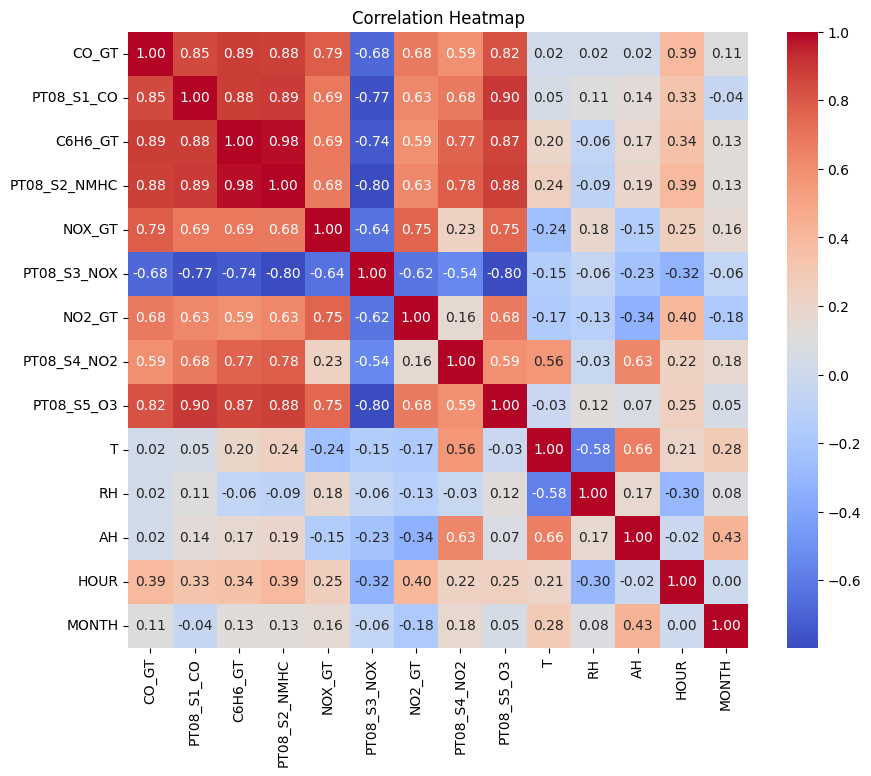

In [8]:
# 🔶 Use a heatmap to explore the correlation between variables only numeric
sns.heatmap(df_air.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Which conclusions can be drawn from the output? Comment on

- value range: [-0.8, 1.0] in this case but in general its [-1, 1]
- values on the diagonal: All are 1.0 (correlation of a variable with itself)
- meaning of the values: It shows how correlated the variables are to each other (positive value means positive correlation, negative value means negative correlation)
- expectations for modeling the data drawn from the correlation matrix: 

&#x1F536; **Your Answer**:

2.2 Understand the Degree of Linearity between the Input Features and the Target <span style="color:#4ea373">[1pt]</span>

In [9]:
import warnings
warnings.filterwarnings('ignore')

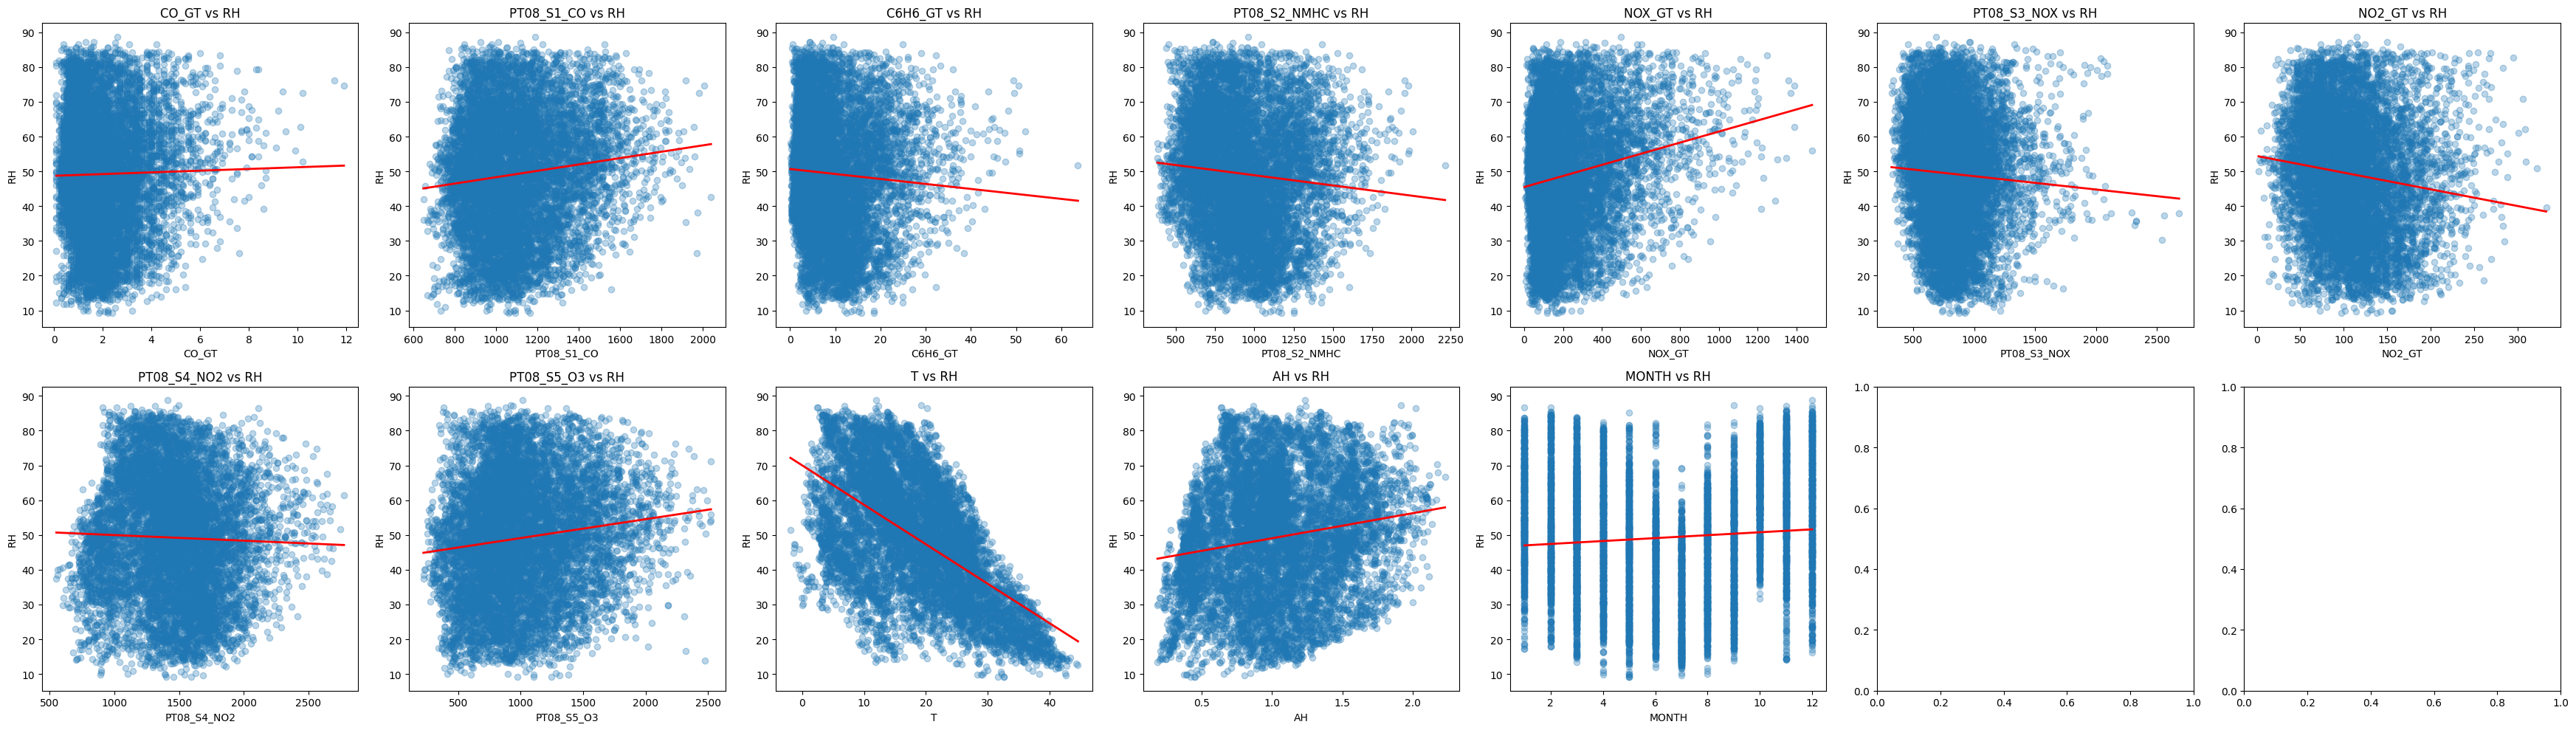

In [10]:
# 🔶 Plot all features (x-axis) against output variable RH (y-axis) in a 2 x 7 grid with `sns.regplot`. (Use a for loop and don't add the plots manually).
# 🔶 Make sure that the regression curve is clearly visible.

df_numeric = df_air.select_dtypes(include=['number'])

features = df_numeric.drop(columns=['RH'], errors='ignore').columns

fig, axes = plt.subplots(2, 7, figsize=(35, 10))
axes = axes.ravel()

for ax, feature in zip(axes, features):
    sns.regplot(
        x=df_air[feature], 
        y=df_air["RH"],
        ci=None,
        line_kws={'color': 'red', 'lw': 2},
        scatter_kws={'alpha': 0.3},
        ax=ax
    )
    ax.set_title(f"{feature} vs RH")

plt.tight_layout()
plt.show()



TODO: Comment on the results. How does the heatplot relate to them?


&#x1F536; **Your Answer**:

- The direction of each scatterplot’s regression line matches the sign of that variable pair’s correlation in the heatmap.  
- A steep regression line in a scatterplot corresponds to a stronger correlation value in the heatmap.  
- The almost flat regression line in CO_GT vs. RH reflects their very low correlation.  
- Other pairs have correspondingly high positive or negative correlations in the heatmap and steeper regression lines.

#### 3. Training Regression Models

3.1. Data Preparations for Training  <span style="color:#4ea373">[1pt]</span>

In [11]:
# 🔶 Define your train and test sets of variables. If you are unsure about the target variable, check the dataset description.
X = df_air.drop(columns=['RH'])
y = df_air['RH']

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (8991, 13)
Shape of y: (8991,)


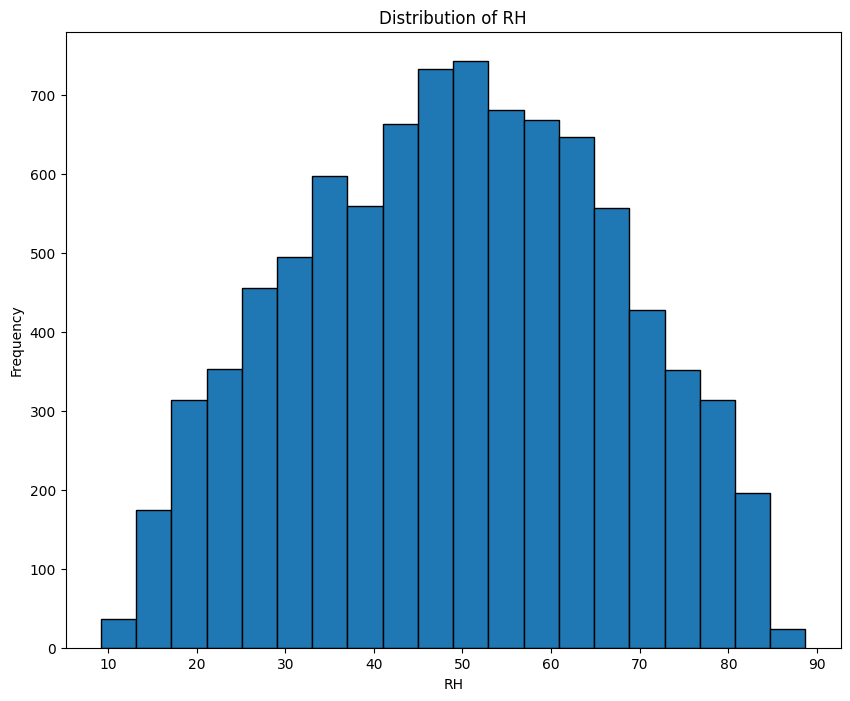

In [12]:
# 🔶 Plot the distribution of the target variable as a histogram
plt.hist(y, bins=20, edgecolor='black')
plt.xlabel('RH')
plt.ylabel('Frequency')
plt.title('Distribution of RH')
plt.show()


In [13]:
# 🔶 Split the data into training and testing sets using `train_test_split` with a test size of 0.3. Use the random seed 42.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Number of train samples: {}'.format(X_train.shape))
print('Number of test samples: {}'.format(X_test.shape))

Number of train samples: (6293, 13)
Number of test samples: (2698, 13)


In [14]:
# 🔶 Normalize the data using `StandardScaler`. Make sure to use the correct data subsets for the operation and don't forget to use the scaled data for all models.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1))
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

3.2 Fit Regression Models  <span style="color:#4ea373">[2pt]</span>

We want to train different models in order to find the best performing one. Fit the following models with their standard hyperparamters. Make sure to set the random seed.
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Machine

Then, predict the RH for the test set and report the RMSE for each of the models

In [15]:
#setting seed
np.random.seed(42)

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regression']

def train_pipeline(X_train, y_train, X_test, y_test):

    rmse = {}

    # 🔶 Train a linear regression model
    lr = LinearRegression().fit(X_train, y_train)
    rmse['Linear Regression'] = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

    # 🔶 Train a decision tree regression model
    dt = DecisionTreeRegressor().fit(X_train, y_train)
    rmse['Decision Tree'] = np.sqrt(mean_squared_error(y_test, dt.predict(X_test)))

    # 🔶 Train a random forest regression model
    rf = RandomForestRegressor().fit(X_train, y_train)
    rmse['Random Forest'] = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

    # 🔶 Train a support vector regression model
    svr = SVR().fit(X_train, y_train)
    rmse['Support Vector Regression'] = np.sqrt(mean_squared_error(y_test, svr.predict(X_test)))
    return rmse, [lr, dt, rf, svr]

rmse, baseline_models = train_pipeline(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

print('RMSE of all models:')
print(pd.DataFrame(rmse.items(), columns=['Model', 'RMSE']))

RMSE of all models:
                       Model      RMSE
0          Linear Regression  0.345957
1              Decision Tree  0.081038
2              Random Forest  0.039026
3  Support Vector Regression  0.088470


Comment on the results.
- Which model would you pick.
    - Random Forest
- Is the outcome surprising or did you assume a similar model ranking given your knowledge about the models?
    - No, because:
    - Ensemble methods often yield better predictive accuracy
    - Decision Trees and SVR also tend to do better than a plain linear model

3.3. Feature Engineering  <span style="color:#4ea373">[1.5pt]</span>

The choice of input features can impact model performance drastically. Let's try to improve our baselines by choosing a different set of input features.



In [16]:
# 🔶 Write function to measure RMSE with different combinations of features.
def train_test_RMSE(df_air, feat_, feat_name):
    """
    The function train_test_RMSE returns the RMSE for different combinations
    of features feat_ of the dataframe df_air.

        :param df_air: (pandas.DataFrame) Our dataset
        :param feat_: (List[str]) A list of column names
        :param feat_name: (str) A string with the name of the feature combination
        :return: (float) The RMSE score value
    """
    X_ = df_air[feat_]
    y_ = df_air['RH']
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=42)


    rmse, _ = train_pipeline(X_train_, y_train_, X_test_, y_test_)
    rmse = pd.DataFrame(rmse.items(), columns=['Model', 'RMSE'])
    rmse['Features'] = feat_name

    return rmse

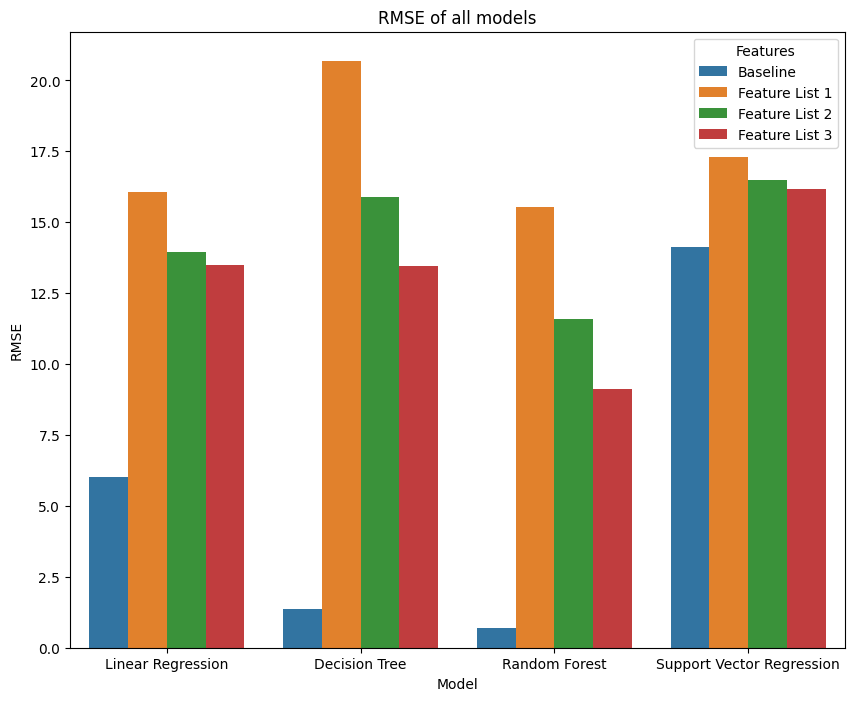

In [17]:
# 🔶 Train the models with 3 different combinations of inputs.

baseline = X.keys()[:]
feature_list1 = ["CO_GT", "PT08_S1_CO", "C6H6_GT"]
feature_list2 = ["CO_GT", "PT08_S1_CO", "C6H6_GT", "NOX_GT", "PT08_S3_NOX", "NO2_GT"]
feature_list3 = ["CO_GT", "PT08_S1_CO", "C6H6_GT", "NOX_GT", "PT08_S3_NOX", "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "AH"]

feature_lists = [baseline, feature_list1, feature_list2, feature_list3]
feature_names = ['Baseline', 'Feature List 1', 'Feature List 2', 'Feature List 3']

rmse = pd.concat([train_test_RMSE(df_air, feat_, name) for feat_, name in zip(feature_lists, feature_names)])

# 🔶 Provide a performance overview of our baseline and the three different feature combinations for all four models. Make a barplot with x = Model, y = RMSE, hue = Features

sns.barplot(x='Model', y='RMSE', hue='Features', data=rmse)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of all models')
plt.legend(title='Features')
plt.show()



Comment on the results

- Is the optimal set of features the same for all models?
- Is there a relationship between the score and the heatmap in the previous lab? If so, why?

&#x1F536; **Your Answer**:

- In my case, the score is alwys baseline < fl3 < fl2 < fl1
- Yes, the correlation heatmap gives a clue as to why certain features help or hurt in different models. If you have strong correlations with the target (RH) but also strong inter‐correlations among predictors linear models suffer but tree‐based methods may still gain predictive power from the additional correlated variables

3.4. Hyperparameter Tuning.  <span style="color:#4ea373">[1pt]</span>

The performance of a model does not only depend on the set of input features but also on the choice of hyperparameters that define the model. Ensemble models like random forests have especially many hyperparameters do choose. Let's make an informed choice by exploring different combinations of hyperparameters and evaluating their performance with `GridSearchCV`.

- use different numbers of estimators
- use cv of 5 or 10
- use the correct scoring function
- then, use the best model hyperparameters to predict on the test data

In [18]:
# 🔶 Your answer
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train_scaled, y_train_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (neg RMSE):", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

rmse_test = np.sqrt(mean_squared_error(y_test_scaled, y_pred))
print("Test RMSE:", rmse_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best CV Score (neg RMSE): -0.044043745554866065
Test RMSE: 0.03922609166789676


What are your conclusions regarding the Grid Search method. Did the performance improve? If not, what could be the reason?

&#x1F536; **Your Answer**:
The slight improvement in RMSE suggests that the random forest was already performing well, and/or that the parameter range was not sufficiently broad to uncover a more significantly improved configuration

3.5. Discretized Error Assessment <span style="color:#4ea373">[2pt]</span>

Let's investigate the performance of the random forest further. Use your random forest model obtained from the grid search.

- Plot the box plots of **absolute** errors vs output range.
- Discretize the output variable RH into three intervals of your choice.
- Calculate the errors for each sample in the intervals.
- Use `sns.boxplot` to plot the errors per interval.

In [19]:
# 🔶 Your answer
y_pred = best_rf.predict(X_test_scaled)

abs_errors = np.abs(y_test_scaled - y_pred)

bins = np.linspace(y_test_scaled.min(), y_test_scaled.max(), 4)
labels = ["Low RH", "Medium RH", "High RH"]
intervals = pd.cut(y_test_scaled, bins=bins, labels=labels, include_lowest=True)

df_errors = pd.DataFrame({
    "RH True": y_test_scaled.values,
    "Prediction": y_pred,
    "Absolute Error": abs_errors,
    "Interval": intervals
})

plt.figure(figsize=(8, 5))
sns.boxplot(x="Interval", y="Absolute Error", data=df_errors)
plt.title("Absolute Errors vs. Target RH Intervals")
plt.show()


ValueError: Input array must be 1 dimensional

***

#### Classification

**Task Description**

We will work with a new dataset for solving a classification task. The new task is to classify the forest cover type given a set of variables describing the environmental surrounding of a location.

## Dataset: Forest cover data
This dataset contains 581012 tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest.

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

<center>

|Sl No| Attribute| Description|
|-| -| -|
|0| Elevation| Elevation in meters|
|1| Aspect| Aspect in degrees azimuth|
|2| Slope| Slope in degrees|
|3| Horizontal_Distance_To_Hydrology|Horizontal distance to nearest surface water features|
|4| Vertical_Distance_To_Hydrology|Vertical distance to nearest surface water features|
|5| Horizontal_Distance_To_Roadways| Horizontal distance to nearest roadway|
|6| Hillshade_9am| Hill shade index at 9am, summer solstice. Value out of 255|
|7| Hillshade_Noon| Hill shade index at noon, summer solstice. Value out of 255|
|8| Hillshade_3pm| Hill shade index at 3pm, summer solstice. Value out of 255|
|9| Horizontal_Distance_To_Fire_Points| Horizontal distance to nearest wildfire ignition points|
|10| Wilderness_Area1| Rawah Wilderness Area|
|11| Wilderness_Area2| Neota Wilderness Area|
|12| Wilderness_Area3| Comanche Peak Wilderness Area|
|13| Wilderness_Area4| Cache la Poudre Wilderness Area|
|14| Soil_Type1 ... Soil_Type40| 40 different Soil Types|
|15| Cover Type| Forest Cover Type designation. Integer value between 1 and 7|

</center>

**Cover Types:**

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

#### 1. Prepare the Dataset <span style="color:#4ea373">[0t]</span>

Repeat the data preparation steps from before:
- read the dataset file
- look at the first 5 rows to check if the reading was successful
- check if there are NaN values and drop the respective rows if needed



In [20]:
# 🔶 Read the dataset and show the first 5 rows
FOREST_HOME = "/Users/merterol/Desktop/iMac27_github/uzh/Computational Science/Sem 4/PHY371/Exercise 1/data/ForestCover.csv"
df = pd.read_csv(FOREST_HOME)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [21]:
# 🔶 Check if there are any missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)


# 🔶 Remove rows with NaN values if needed
df = df.dropna()
print("Missing values after dropping:")
print(df.isnull().sum())


Missing values:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11             

#### 2. Explore the Dataset <span style="color:#4ea373">[1.5pt]</span>


2.1. Visualize the target label distribution  <span style="color:#4ea373">[0.5pt]</span>



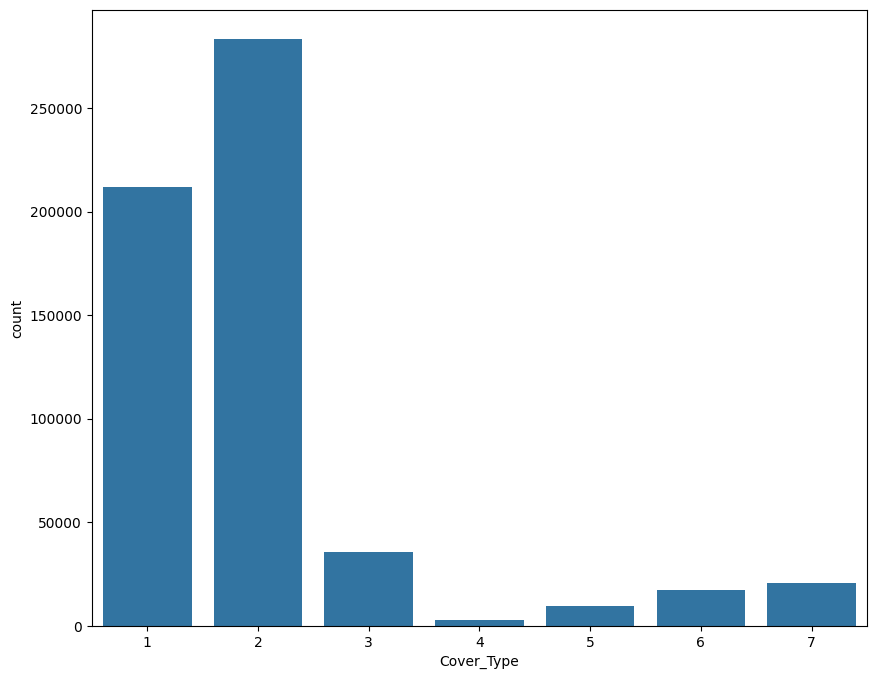

In [22]:
# 🔶 plot the number of samples per covertype by using sns.countplot
sns.countplot(x='Cover_Type', data=df)
plt.show()




2.2 Explore the data distribution per feature per target class.  <span style="color:#4ea373">[1pt]</span>




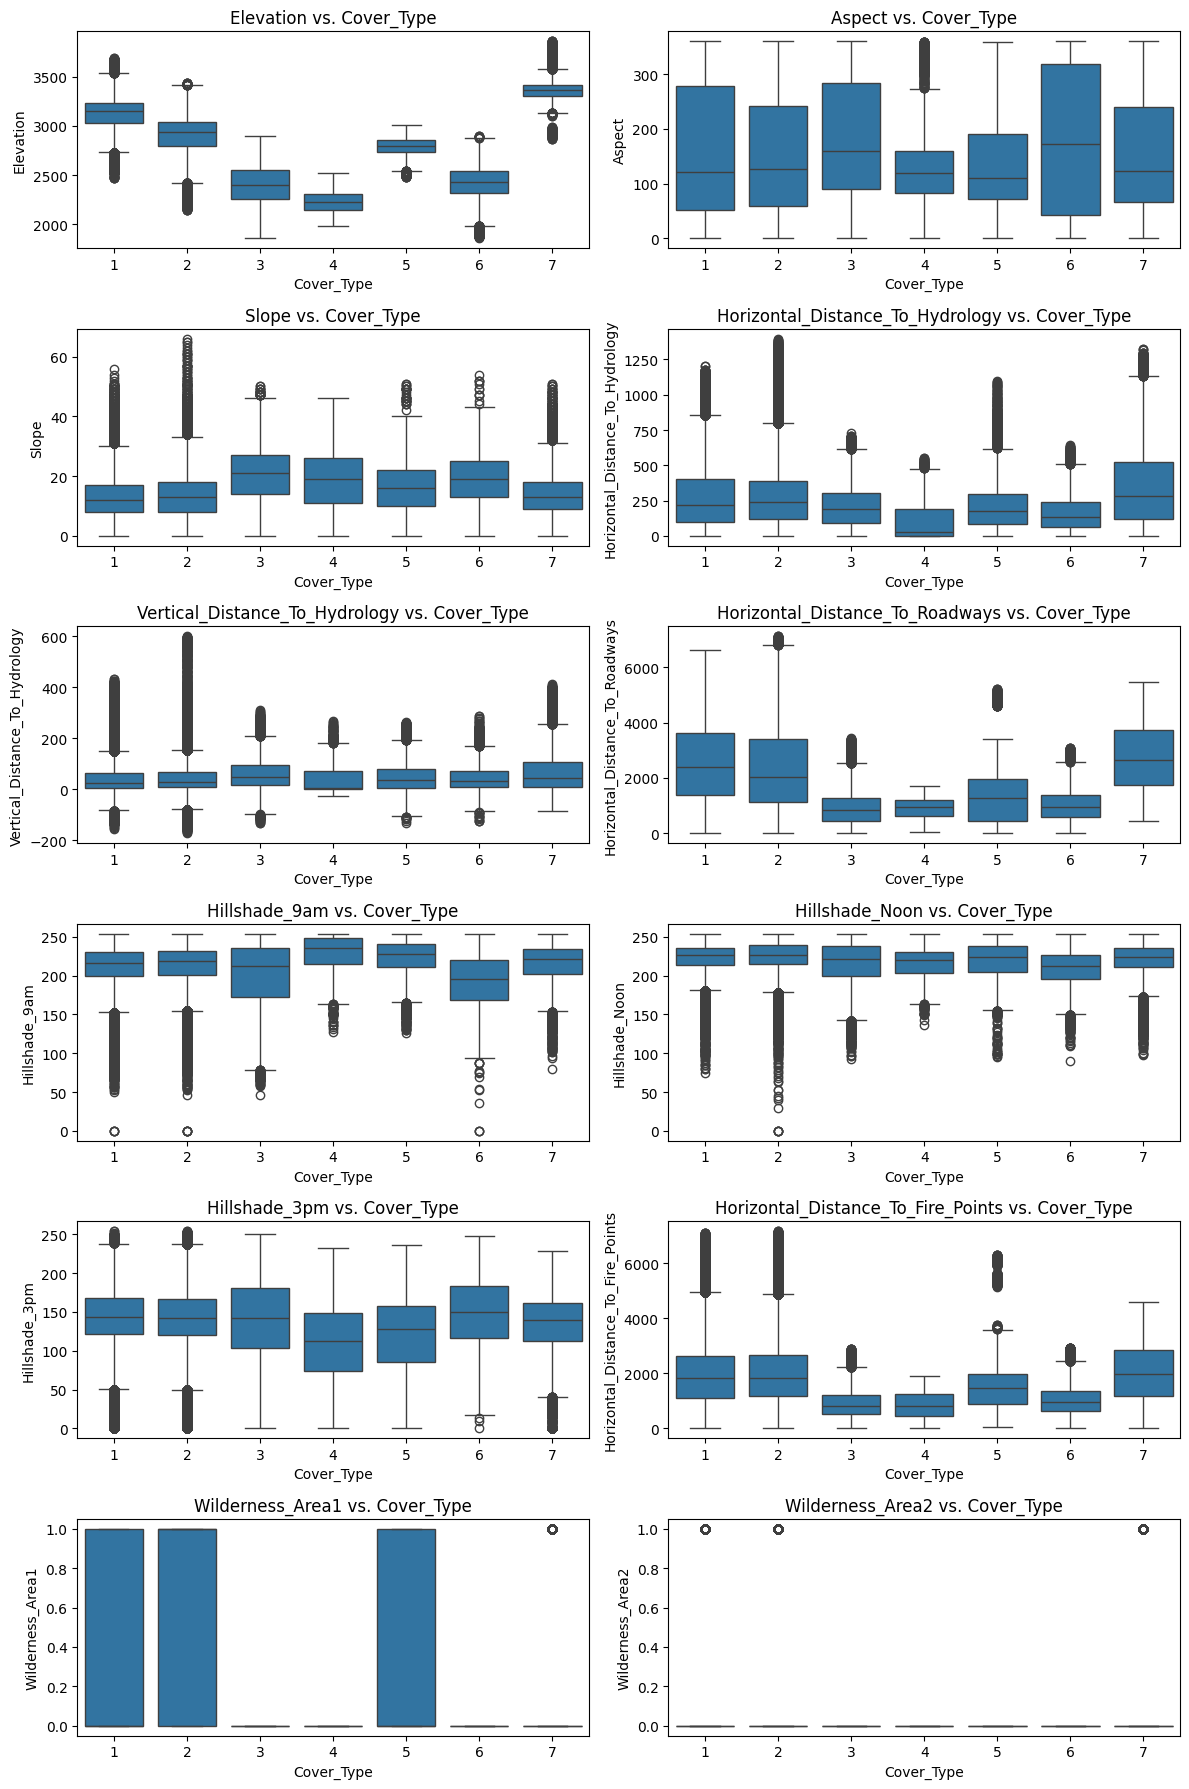

In [23]:
# 🔶 make a boxplot for the first 12 features where you plot the cover type against the feature values.
# 🔶 Use a loop and arrange the plots in a 5 x 2 grid
feature_cols = df.columns[:12]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))
axes = axes.ravel()

for i, feature in enumerate(feature_cols):
    if i >= 12:
        break
    
    sns.boxplot(
        x="Cover_Type",
        y=feature,
        data=df,
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs. Cover_Type")

plt.tight_layout()
plt.show()



Comment on the results.

- which features do you expect to be important for high classification accuracy

&#x1F536; **Your Answer**:

#### 3. Model Training <span style="color:#4ea373">[2pt]</span>

Train the classification models on the first 10 features

- Make sure to prepare the data correctly
- Train a Logistic Regression Model
- Train a Decision Tree Model
- Train a Random Forest Classifier
- Train a K Nearest Neighbor Model

Report the Accuracy on the test set for each of the models



In [24]:
# 🔶 Your answer
X = df.iloc[:, :10]
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

acc_lr = lr.score(X_test_scaled, y_test)
acc_dt = dt.score(X_test_scaled, y_test)
acc_rf = rf.score(X_test_scaled, y_test)
acc_knn = knn.score(X_test_scaled, y_test)

print(f"Accuracy (Logistic Regression) : {acc_lr:.4f}")
print(f"Accuracy (Decision Tree)       : {acc_dt:.4f}")
print(f"Accuracy (Random Forest)       : {acc_rf:.4f}")
print(f"Accuracy (KNN)                 : {acc_knn:.4f}")


Accuracy (Logistic Regression) : 0.6964
Accuracy (Decision Tree)       : 0.9136
Accuracy (Random Forest)       : 0.9489
Accuracy (KNN)                 : 0.8987


Comment on the results.
- Which model would you pick.
- Is the outcome surprising or did you assume a similar model ranking given your knowledge about the models?

&#x1F536; **Your Answer**:

#### 4. Dealing with imbalanced data<span style="color:#4ea373">[3pt]</span>


An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class against hundreds, thousands, or millions of examples in the majority class or classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

A commonly used strategy for counterbalancing the dataset is resampling. There are two main methods that you can use to even-up the classes:

1. You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement)
2. You can delete instances from the over-represented class, called under-sampling.

Let's retrain the Random Forest classifiers with both under-sampled data and over-sampled data, and compare their accuracy scores.

4.1. Undersampling <span style="color:#4ea373">[1pt]</span>

In [25]:
# 🔶 print the size of the smallest class
class_counts = df['Cover_Type'].value_counts()

print("Class distribution:")
print(class_counts)

print("\nThe smallest class size:", class_counts.min())


Class distribution:
Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

The smallest class size: 2747


In [ ]:
# 🔶 Undersample all the majority classes so that all classes have the same cardinality.
class_counts = df["Cover_Type"].value_counts()
smallest_size = class_counts.min()
undersampled_list = []

for class_label in class_counts.index:
    df_class = df[df["Cover_Type"] == class_label]
    df_class_undersampled = df_class.sample(n=smallest_size, random_state=42)
    undersampled_list.append(df_class_undersampled)

df_undersampled = pd.concat(undersampled_list, axis=0).reset_index(drop=True)

print("\nClass distribution after undersampling:")
print(df_undersampled["Cover_Type"].value_counts())


Class distribution after undersampling:
Cover_Type
2    2747
1    2747
3    2747
7    2747
6    2747
5    2747
4    2747
Name: count, dtype: int64


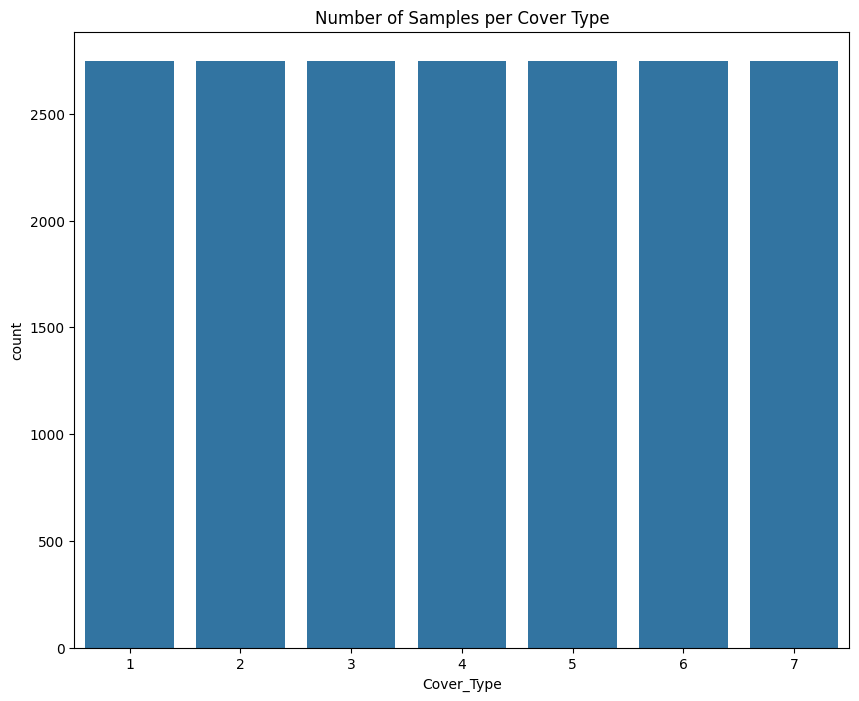

In [27]:
# 🔶 plot the number of samples per covertype
plt.figure()
sns.countplot(x="Cover_Type", data=df_undersampled)
plt.title("Number of Samples per Cover Type")
plt.show()

In [29]:
# 🔶 Fit a new Random Forest Classifier for this data subset and print it's performance.
# 🔶 (Hint: Don't forget to prepare the data correctly)
X_undersampled = df_undersampled.drop("Cover_Type", axis=1)
y_undersampled = df_undersampled["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X_undersampled,
    y_undersampled,
    test_size=0.3,
    random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy on the undersampled data:", accuracy)

Random Forest Accuracy on the undersampled data: 0.8623678280464552


4.2 Oversampling <span style="color:#4ea373">[2pt]</span>

Repeat the procedure but this time oversample the underrepresented classes.


Largest class size: 283301


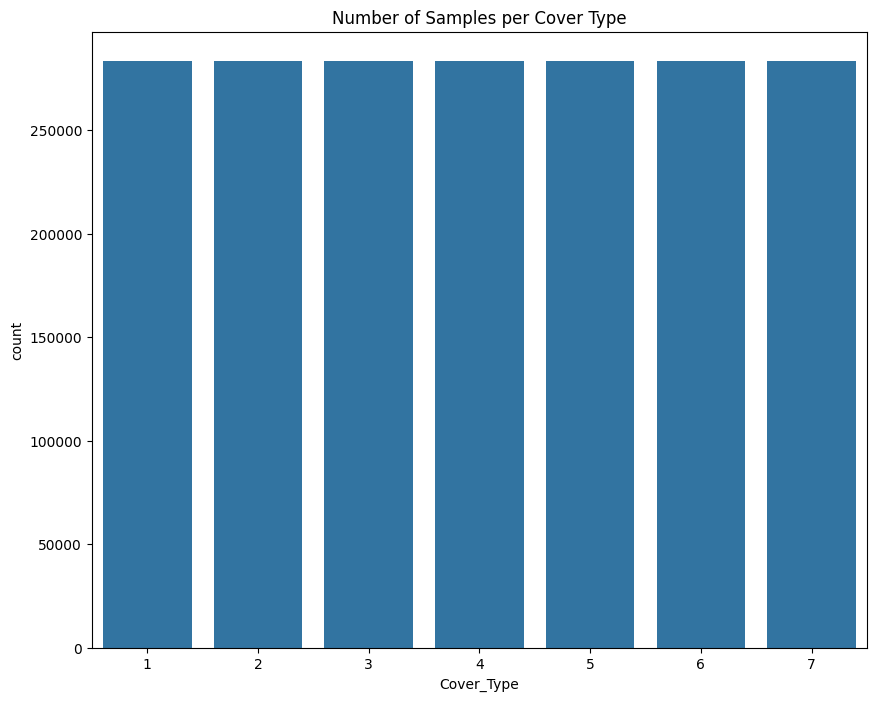

Random Forest Accuracy on the oversampled data: 0.9942464109403916


In [31]:
# 🔶 print the size of the largest class
class_counts = df["Cover_Type"].value_counts()
largest_size = class_counts.max()
print("\nLargest class size:", largest_size)

# 🔶 Oversample all the majority classes so that all classes have the same cardinality.
df_oversampled = []

for class_label, count in class_counts.items():
    df_class = df[df["Cover_Type"] == class_label]
    # Sample with replacement up to largest_size
    df_class_oversampled = df_class.sample(n=largest_size, 
                                            replace=True, 
                                            random_state=42)
    df_oversampled.append(df_class_oversampled)

df_oversampled = pd.concat(df_oversampled, axis=0).reset_index(drop=True)
# 🔶 plot the number of samples per covertype
plt.figure()
sns.countplot(x="Cover_Type", data=df_oversampled)
plt.title("Number of Samples per Cover Type")
plt.show()

# 🔶 Fit a new Random Forest Classifier for this data subset and print it's performance.
# 🔶 (Hint: Don't forget to prepare the data correctly)
X_oversampled = df_oversampled.drop("Cover_Type", axis=1)
y_oversampled = df_oversampled["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled, 
    y_oversampled,
    test_size=0.3, 
    random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy on the oversampled data:", accuracy)

&#x1F536; **Your Answer**:



Comment on the results. Does one method clearly outperform the other? If so, can you think of a reason for that?